# Labos en R

*Tous les labos, version R. (Pas de labo 1.)*

---

## Labo 2

### Help

In [8]:
# help()
# help(function)
# help(package='package-name)

### Packages

In [2]:
# install
# install.packages('package-name')

# already installed with conda
#install.packages("foreign")

# new installs
#install.packages("Rcmdr", dependencies = TRUE, repos="http://cran.rstudio.com/") # in conda?
#install.packages("nortest", repos="http://cran.rstudio.com/")
#install.packages("sas7bdat", repos="http://cran.rstudio.com/")
#install.packages("Hmisc", repos="http://cran.rstudio.com/")
#install.packages("pastecs", repos="http://cran.rstudio.com/")

# import
# library('package-name')

library(foreign)
library(nortest)
library(sas7bdat)
library(Hmisc)
library(pastecs)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:survival’:

    aml

The following object is masked from ‘package:lattice’:

    melanoma



### Working space

In [2]:
ls()
# rm(list=ls())
# setwd()
getwd()

character(0)

[1] "/home/inrs/EUR8217/labo"

### Read data

In [3]:
# import excel : via txt tab separated
#fichierTexte <- read.table("data/labo2/SR_Data.txt", header = TRUE)

# import DBF (DBase)
fichierDBF <- read.dbf("data/labo2/SR_Data.dbf")

# import SPSS
#fichierSPSS <- read.spss("data/labo2/Data_SPSS.sav", to.data.frame=TRUE)

# import SAS
#fichierSAS <- read.sas7bdat("data/labo2/tableau1.sas7bdat", debug=FALSE)

head(fichierDBF)

POPTOT_FR FAIBLEREV MONOPCT MENAGE1PCT IMMREC_PCT TX_CHOM NOECOLEPCT
1       970        35   11.48      16.67       1.03    1.80       8.00
2      9105      2965   21.74      24.22       5.43   10.36      30.42
3      4190       435   13.93      26.59       3.10    4.55      22.69
4      1300       335   22.95      60.36       0.77    8.89      68.75
5      6270      1010   15.47      21.96       3.43    7.52      29.31
6      4340       935   16.88      23.00       3.11    4.61      25.00
  SCO_M9PCT SCO_M13PCT PARTIELPCT FAIBREVPCT INDICE_PAU Dist_Min N_1000
1      6.16      24.66      45.13       3.61    0.49681 6264.772  0.000
2      9.64      34.44      41.68      32.56    1.49218 1458.956  0.179
3      3.76      28.84      40.94      10.38    0.69996 1094.887  0.372
4      7.23      36.60      33.33      25.77    1.15688 1155.835  0.348
5      4.59      33.22      45.08      16.11    0.89715 1097.945  0.590
6      6.61      34.03      47.60      21.54    0.97111  705.672  1.075
  Dist_Moy_3 Shape_Leng Shape_Area
1   8835.786  20110.133  7483046.6
2   3352.854  12854.564  2958949.3
3   1862.379   7010.869  1452463.0
4   1826.470   6303.374   683634.5
5   1652.041   5814.048  1764655.0
6   1343.423   8928.198  1105846.6

### Table structure

In [4]:
# show variable names
names(fichierDBF)
# indexes start at 1

# delete variable
fichierDBF$Shape_Leng <- NULL

# rename variable
names(fichierDBF)[1] <- "POPTOT"

# create variable
fichierDBF$km <- fichierDBF$Shape_Area / 1000000
fichierDBF$HabKm2 <- fichierDBF$POPTOT / fichierDBF$km

head(fichierDBF)

[1] "POPTOT_FR"  "FAIBLEREV"  "MONOPCT"    "MENAGE1PCT" "IMMREC_PCT"
 [6] "TX_CHOM"    "NOECOLEPCT" "SCO_M9PCT"  "SCO_M13PCT" "PARTIELPCT"
[11] "FAIBREVPCT" "INDICE_PAU" "Dist_Min"   "N_1000"     "Dist_Moy_3"
[16] "Shape_Leng" "Shape_Area"

POPTOT FAIBLEREV MONOPCT MENAGE1PCT IMMREC_PCT TX_CHOM NOECOLEPCT SCO_M9PCT
1    970        35   11.48      16.67       1.03    1.80       8.00      6.16
2   9105      2965   21.74      24.22       5.43   10.36      30.42      9.64
3   4190       435   13.93      26.59       3.10    4.55      22.69      3.76
4   1300       335   22.95      60.36       0.77    8.89      68.75      7.23
5   6270      1010   15.47      21.96       3.43    7.52      29.31      4.59
6   4340       935   16.88      23.00       3.11    4.61      25.00      6.61
  SCO_M13PCT PARTIELPCT FAIBREVPCT INDICE_PAU Dist_Min N_1000 Dist_Moy_3
1      24.66      45.13       3.61    0.49681 6264.772  0.000   8835.786
2      34.44      41.68      32.56    1.49218 1458.956  0.179   3352.854
3      28.84      40.94      10.38    0.69996 1094.887  0.372   1862.379
4      36.60      33.33      25.77    1.15688 1155.835  0.348   1826.470
5      33.22      45.08      16.11    0.89715 1097.945  0.590   1652.041
6      34.03      47.60      21.54    0.97111  705.672  1.075   1343.423
  Shape_Area        km    HabKm2
1  7483046.6 7.4830466  129.6263
2  2958949.3 2.9589493 3077.1058
3  1452463.0 1.4524630 2884.7551
4   683634.5 0.6836345 1901.6008
5  1764655.0 1.7646550 3553.1023
6  1105846.6 1.1058466 3924.5951

In [5]:
 # new table from a subset
names(fichierDBF)
ZScores <-fichierDBF[,c(12:15)]
names(ZScores)

[1] "POPTOT"     "FAIBLEREV"  "MONOPCT"    "MENAGE1PCT" "IMMREC_PCT"
 [6] "TX_CHOM"    "NOECOLEPCT" "SCO_M9PCT"  "SCO_M13PCT" "PARTIELPCT"
[11] "FAIBREVPCT" "INDICE_PAU" "Dist_Min"   "N_1000"     "Dist_Moy_3"
[16] "Shape_Area" "km"         "HabKm2"

[1] "INDICE_PAU" "Dist_Min"   "N_1000"     "Dist_Moy_3"

### Normality

#### Kolmogorov-Smirnov

https://bcourses.berkeley.edu/courses/1267848/pages/lab-5

In [17]:
#ks.test(fichierDBF[18:20])

ERROR: Error in FUN(X[[i]], ...): l'argument "y" est manquant, avec aucune valeur par défaut


In [14]:
sapply(fichierDBF[18:20],lillie.test)

HabKm2                                          
statistic 0.09465468                                      
p.value   1.051956e-11                                    
method    "Lilliefors (Kolmogorov-Smirnov) normality test"
data.name "X[[i]]"                                        
          SqrtDens                                        
statistic 0.02742644                                      
p.value   0.469466                                        
method    "Lilliefors (Kolmogorov-Smirnov) normality test"
data.name "X[[i]]"                                        
          SqrtImg                                         
statistic 0.07141727                                      
p.value   1.823375e-06                                    
method    "Lilliefors (Kolmogorov-Smirnov) normality test"
data.name "X[[i]]"

#### Shapiro-Wilk

In [15]:
sapply(fichierDBF[18:20],shapiro.test)

HabKm2                        SqrtDens                     
statistic 0.902345                      0.990485                     
p.value   1.811718e-17                  0.002371701                  
method    "Shapiro-Wilk normality test" "Shapiro-Wilk normality test"
data.name "X[[i]]"                      "X[[i]]"                     
          SqrtImg                      
statistic 0.9697826                    
p.value   1.052118e-08                 
method    "Shapiro-Wilk normality test"
data.name "X[[i]]"

### Transformations

#### Square root

In [6]:
fichierDBF$SqrtDens <- sqrt(fichierDBF$HabKm2)
fichierDBF$SqrtImg <- sqrt(fichierDBF$IMMREC_PCT)

#### Logarithmic

In [7]:
# log(0) = error
fichierDBF$LogDens <- log(fichierDBF$HabKm2)
fichierDBF$LogImg <- log(fichierDBF$IMMREC_PCT+1)

summary(fichierDBF)

     POPTOT       FAIBLEREV         MONOPCT        MENAGE1PCT   
 Min.   : 245   Min.   :  10.0   Min.   : 0.00   Min.   : 3.94  
 1st Qu.:2241   1st Qu.: 521.2   1st Qu.:16.05   1st Qu.:28.59  
 Median :3328   Median : 900.0   Median :21.23   Median :38.60  
 Mean   :3500   Mean   :1015.3   Mean   :21.38   Mean   :37.67  
 3rd Qu.:4544   3rd Qu.:1330.0   3rd Qu.:26.18   3rd Qu.:46.76  
 Max.   :9105   Max.   :4195.0   Max.   :51.28   Max.   :72.63  
   IMMREC_PCT        TX_CHOM         NOECOLEPCT      SCO_M9PCT    
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.00   Min.   : 0.00  
 1st Qu.: 2.112   1st Qu.: 6.593   1st Qu.:24.52   1st Qu.: 7.56  
 Median : 3.850   Median : 8.555   Median :32.66   Median :14.23  
 Mean   : 5.199   Mean   : 9.456   Mean   :32.66   Mean   :14.63  
 3rd Qu.: 6.473   3rd Qu.:11.670   3rd Qu.:40.93   3rd Qu.:20.97  
 Max.   :25.790   Max.   :47.440   Max.   :68.75   Max.   :37.05  
   SCO_M13PCT      PARTIELPCT      FAIBREVPCT      INDICE_PAU    
 Min.   : 

#### Centrage et réduction

In [9]:
ZScores$INDICE_PAU <- scale(fichierDBF[1], center = TRUE, scale = TRUE)
ZScores$Dist_Min <- scale(fichierDBF[2], center = TRUE, scale = TRUE)
ZScores$N_1000 <- scale(fichierDBF[3], center = TRUE, scale = TRUE)
ZScores$Dist_Moy_3 <- scale(fichierDBF[4], center = TRUE, scale = TRUE)

#help(sapply)
sapply(ZScores,mean)
sapply(ZScores,sd)

INDICE_PAU      Dist_Min        N_1000    Dist_Moy_3 
 2.692851e-17  5.717112e-17 -1.923687e-16 -2.036597e-16

INDICE_PAU   Dist_Min     N_1000 Dist_Moy_3 
         1          1          1          1

### Descriptive statistics

In [8]:
summary(fichierDBF)

     POPTOT       FAIBLEREV         MONOPCT        MENAGE1PCT   
 Min.   : 245   Min.   :  10.0   Min.   : 0.00   Min.   : 3.94  
 1st Qu.:2241   1st Qu.: 521.2   1st Qu.:16.05   1st Qu.:28.59  
 Median :3328   Median : 900.0   Median :21.23   Median :38.60  
 Mean   :3500   Mean   :1015.3   Mean   :21.38   Mean   :37.67  
 3rd Qu.:4544   3rd Qu.:1330.0   3rd Qu.:26.18   3rd Qu.:46.76  
 Max.   :9105   Max.   :4195.0   Max.   :51.28   Max.   :72.63  
   IMMREC_PCT        TX_CHOM         NOECOLEPCT      SCO_M9PCT    
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.00   Min.   : 0.00  
 1st Qu.: 2.112   1st Qu.: 6.593   1st Qu.:24.52   1st Qu.: 7.56  
 Median : 3.850   Median : 8.555   Median :32.66   Median :14.23  
 Mean   : 5.199   Mean   : 9.456   Mean   :32.66   Mean   :14.63  
 3rd Qu.: 6.473   3rd Qu.:11.670   3rd Qu.:40.93   3rd Qu.:20.97  
 Max.   :25.790   Max.   :47.440   Max.   :68.75   Max.   :37.05  
   SCO_M13PCT      PARTIELPCT      FAIBREVPCT      INDICE_PAU    
 Min.   : 

In [14]:
sapply(fichierDBF, mean)
sapply(fichierDBF, sd)
sapply(fichierDBF, min)
sapply(fichierDBF, max)
sapply(fichierDBF, median)
sapply(fichierDBF, range)
sapply(fichierDBF, quantile)

POPTOT    FAIBLEREV      MONOPCT   MENAGE1PCT   IMMREC_PCT      TX_CHOM 
2.450000e+02 1.000000e+01 0.000000e+00 3.940000e+00 0.000000e+00 0.000000e+00 
  NOECOLEPCT    SCO_M9PCT   SCO_M13PCT   PARTIELPCT   FAIBREVPCT   INDICE_PAU 
0.000000e+00 0.000000e+00 5.100000e+00 3.065000e+01 1.230000e+00 1.742900e-01 
    Dist_Min       N_1000   Dist_Moy_3   Shape_Area           km       HabKm2 
1.825400e+02 0.000000e+00 4.223220e+02 3.822059e+04 3.822059e-02 1.239826e+02 
    SqrtDens      SqrtImg      LogDens       LogImg 
1.113475e+01 0.000000e+00 4.820141e+00 0.000000e+00

POPTOT    FAIBLEREV      MONOPCT   MENAGE1PCT   IMMREC_PCT      TX_CHOM 
9.105000e+03 4.195000e+03 5.128000e+01 7.263000e+01 2.579000e+01 4.744000e+01 
  NOECOLEPCT    SCO_M9PCT   SCO_M13PCT   PARTIELPCT   FAIBREVPCT   INDICE_PAU 
6.875000e+01 3.705000e+01 7.049000e+01 6.979000e+01 8.264000e+01 3.895590e+00 
    Dist_Min       N_1000   Dist_Moy_3   Shape_Area           km       HabKm2 
6.389749e+03 5.564000e+00 8.835786e+03 2.887503e+07 2.887503e+01 4.477697e+04 
    SqrtDens      SqrtImg      LogDens       LogImg 
2.116057e+02 5.078386e+00 1.070945e+01 3.288029e+00

POPTOT FAIBLEREV MONOPCT MENAGE1PCT IMMREC_PCT TX_CHOM NOECOLEPCT
[1,]    245        10    0.00       3.94       0.00    0.00       0.00
[2,]   9105      4195   51.28      72.63      25.79   47.44      68.75
     SCO_M9PCT SCO_M13PCT PARTIELPCT FAIBREVPCT INDICE_PAU Dist_Min N_1000
[1,]      0.00       5.10      30.65       1.23    0.17429  182.540  0.000
[2,]     37.05      70.49      69.79      82.64    3.89559 6389.749  5.564
     Dist_Moy_3  Shape_Area          km     HabKm2  SqrtDens  SqrtImg   LogDens
[1,]    422.322    38220.59  0.03822059   123.9826  11.13475 0.000000  4.820141
[2,]   8835.786 28875026.24 28.87502624 44776.9715 211.60570 5.078386 10.709449
       LogImg
[1,] 0.000000
[2,] 3.288029

In [15]:
# Hmisc.describe
describe(fichierDBF)

fichierDBF 

 22  Variables      506  Observations
--------------------------------------------------------------------------------
POPTOT 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
    506       0     403       1    3500    1225    1600    2241    3328    4544 
    .90     .95 
   5905    6492 

lowest :  245  280  405  415  420, highest: 7435 7485 7605 8240 9105 
--------------------------------------------------------------------------------
FAIBLEREV 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
    506       0     288       1    1015   216.2   310.0   521.2   900.0  1330.0 
    .90     .95 
 1867.5  2283.8 

lowest :   10   25   35   60   70, highest: 3225 3320 3360 3505 4195 
--------------------------------------------------------------------------------
MONOPCT 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
    506       0     444       1   21.38   8.793  11.365  16.053

In [13]:
# pastece.stat.desc
stat.desc(fichierDBF, basic=TRUE, norm=TRUE)

POPTOT    FAIBLEREV      MONOPCT    MENAGE1PCT   IMMREC_PCT
nbr.val       5.060000e+02 5.060000e+02 5.060000e+02  5.060000e+02 5.060000e+02
nbr.null      0.000000e+00 0.000000e+00 3.000000e+00  0.000000e+00 1.200000e+01
nbr.na        0.000000e+00 0.000000e+00 0.000000e+00  0.000000e+00 0.000000e+00
min           2.450000e+02 1.000000e+01 0.000000e+00  3.940000e+00 0.000000e+00
max           9.105000e+03 4.195000e+03 5.128000e+01  7.263000e+01 2.579000e+01
range         8.860000e+03 4.185000e+03 5.128000e+01  6.869000e+01 2.579000e+01
sum           1.770770e+06 5.137650e+05 1.082010e+04  1.906308e+04 2.630910e+03
median        3.327500e+03 9.000000e+02 2.122500e+01  3.860000e+01 3.850000e+00
mean          3.499545e+03 1.015346e+03 2.138360e+01  3.767407e+01 5.199427e+00
SE.mean       7.206961e+01 2.997235e+01 3.486781e-01  5.752152e-01 2.079846e-01
CI.mean.0.95  1.415932e+02 5.888586e+01 6.850384e-01  1.130110e+00 4.086217e-01
var           2.628179e+06 4.545610e+05 6.151768e+01  1.674215e+02 2.188835e+01
std.dev       1.621166e+03 6.742114e+02 7.843321e+00  1.293915e+01 4.678498e+00
coef.var      4.632504e-01 6.640214e-01 3.667915e-01  3.434496e-01 8.998104e-01
skewness      4.580196e-01 1.297384e+00 3.164988e-01 -1.944095e-01 1.878087e+00
skew.2SE      2.109287e+00 5.974756e+00 1.457550e+00 -8.953012e-01 8.649029e+00
kurtosis     -2.809046e-01 2.152729e+00 5.053750e-01 -3.669465e-01 3.831913e+00
kurt.2SE     -6.480749e-01 4.966561e+00 1.165951e+00 -8.465821e-01 8.840606e+00
normtest.W    9.794847e-01 9.080907e-01 9.921971e-01  9.904918e-01 8.126530e-01
normtest.p    1.492635e-06 6.229604e-17 9.466510e-03  2.384552e-03 8.304258e-24
                  TX_CHOM    NOECOLEPCT     SCO_M9PCT    SCO_M13PCT
nbr.val      5.060000e+02   506.0000000  5.060000e+02  5.060000e+02
nbr.null     1.000000e+00     2.0000000  2.000000e+00  0.000000e+00
nbr.na       0.000000e+00     0.0000000  0.000000e+00  0.000000e+00
min          0.000000e+00     0.0000000  0.000000e+00  5.100000e+00
max          4.744000e+01    68.7500000  3.705000e+01  7.049000e+01
range        4.744000e+01    68.7500000  3.705000e+01  6.539000e+01
sum          4.784530e+03 16523.9600000  7.405130e+03  1.994855e+04
median       8.555000e+00    32.6550000  1.423000e+01  4.026000e+01
mean         9.455593e+00    32.6560474  1.463464e+01  3.942401e+01
SE.mean      2.021010e-01     0.5420269  3.759026e-01  6.790740e-01
CI.mean.0.95 3.970624e-01     1.0649054  7.385256e-01  1.334158e+00
var          2.066748e+01   148.6593281  7.149921e+01  2.333376e+02
std.dev      4.546150e+00    12.1925932  8.455721e+00  1.527539e+01
coef.var     4.807896e-01     0.3733640  5.777879e-01  3.874642e-01
skewness     2.059130e+00     0.1309755  2.535259e-01 -2.082819e-01
skew.2SE     9.482773e+00     0.6031725  1.167546e+00 -9.591866e-01
kurtosis     1.078710e+01    -0.1434156 -7.592333e-01 -9.690013e-01
kurt.2SE     2.488691e+01    -0.3308741 -1.751627e+00 -2.235583e+00
normtest.W   8.804074e-01     0.9956741  9.748390e-01  9.705679e-01
normtest.p   2.508637e-19     0.1766715  1.216573e-07  1.513410e-08
               PARTIELPCT    FAIBREVPCT   INDICE_PAU     Dist_Min       N_1000
nbr.val      5.060000e+02  5.060000e+02 5.060000e+02 5.060000e+02 5.060000e+02
nbr.null     0.000000e+00  0.000000e+00 0.000000e+00 0.000000e+00 4.500000e+01
nbr.na       0.000000e+00  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
min          3.065000e+01  1.230000e+00 1.742900e-01 1.825400e+02 0.000000e+00
max          6.979000e+01  8.264000e+01 3.895590e+00 6.389749e+03 5.564000e+00
range        3.914000e+01  8.141000e+01 3.721300e+00 6.207209e+03 5.564000e+00
sum          2.308095e+04  1.517067e+04 7.897804e+02 4.603061e+05 6.172220e+02
median       4.546500e+01  2.870000e+01 1.547965e+00 7.288930e+02 1.000000e+00
mean         4.561453e+01  2.998156e+01 1.560831e+00 9.096958e+02 1.219806e+00
SE.mean      2.896618e-01  6.344623e-01 2.693806e-02 2.967610e+01 4.381706e-02
CI.mean.0.95 5.690906e-01  1.246511e+00 5.2

### Histograms

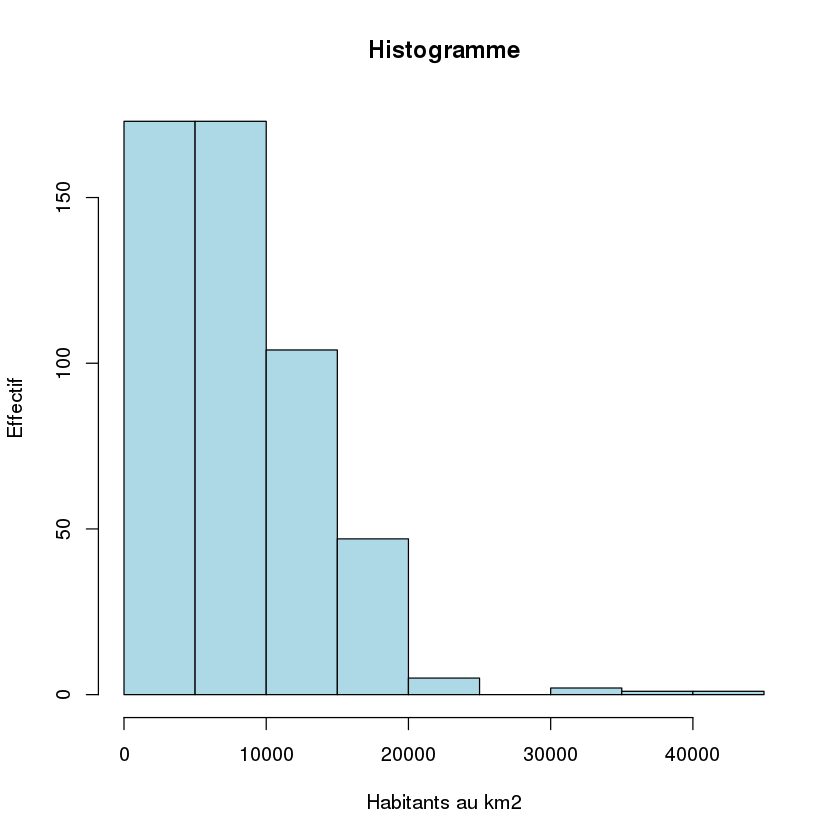

In [16]:
hist(fichierDBF$HabKm2, main="Histogramme", xlab="Habitants au km2", ylab="Effectif", breaks=10, col='lightblue')

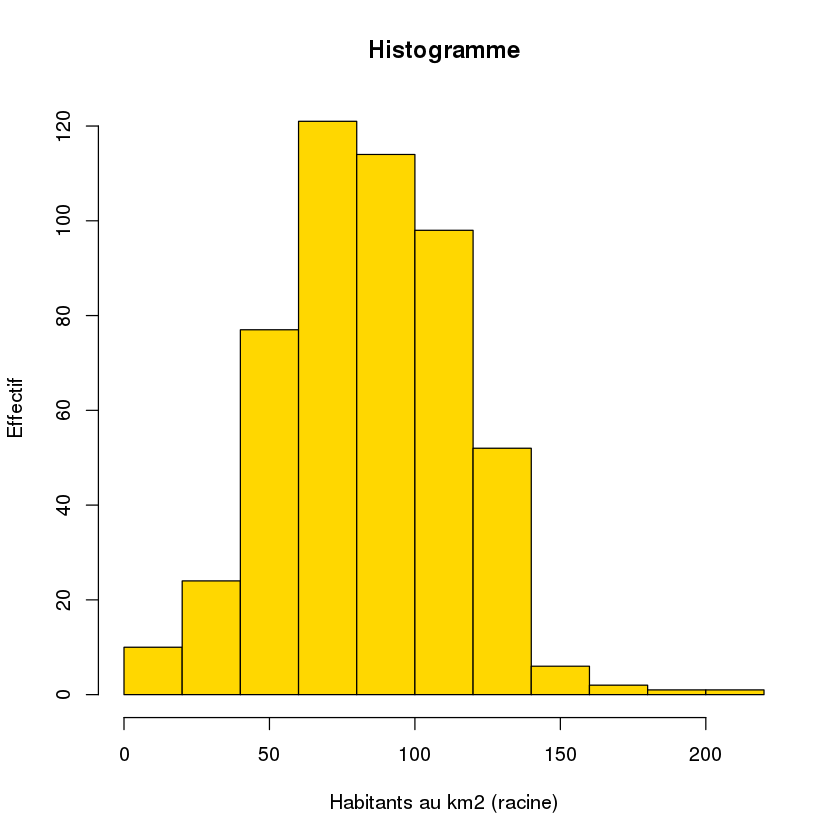

In [17]:
hist(fichierDBF$SqrtDens, main="Histogramme", xlab="Habitants au km2 (racine)", ylab="Effectif", breaks=10, col='gold')

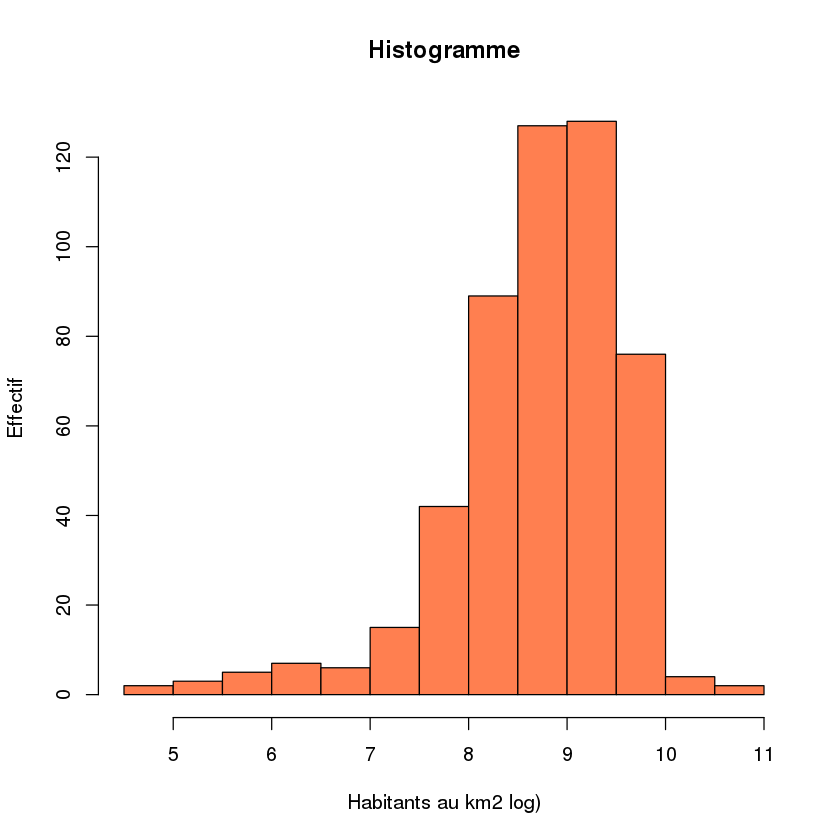

In [18]:
hist(fichierDBF$LogDens, main="Histogramme", xlab="Habitants au km2 log)", ylab="Effectif", breaks=10, col='coral')

#### Histogram with normal curve

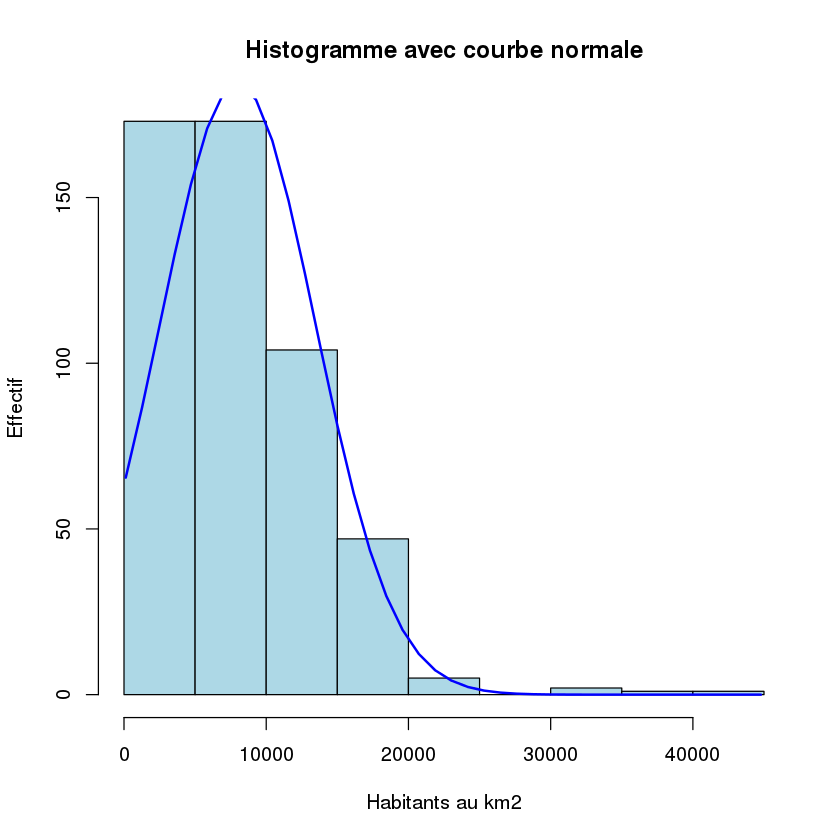

In [20]:
x <- fichierDBF$HabKm2
h<-hist(x, breaks=10, col="lightblue", xlab="Habitants au km2", ylab="Effectif", 
main="Histogramme avec courbe normale")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

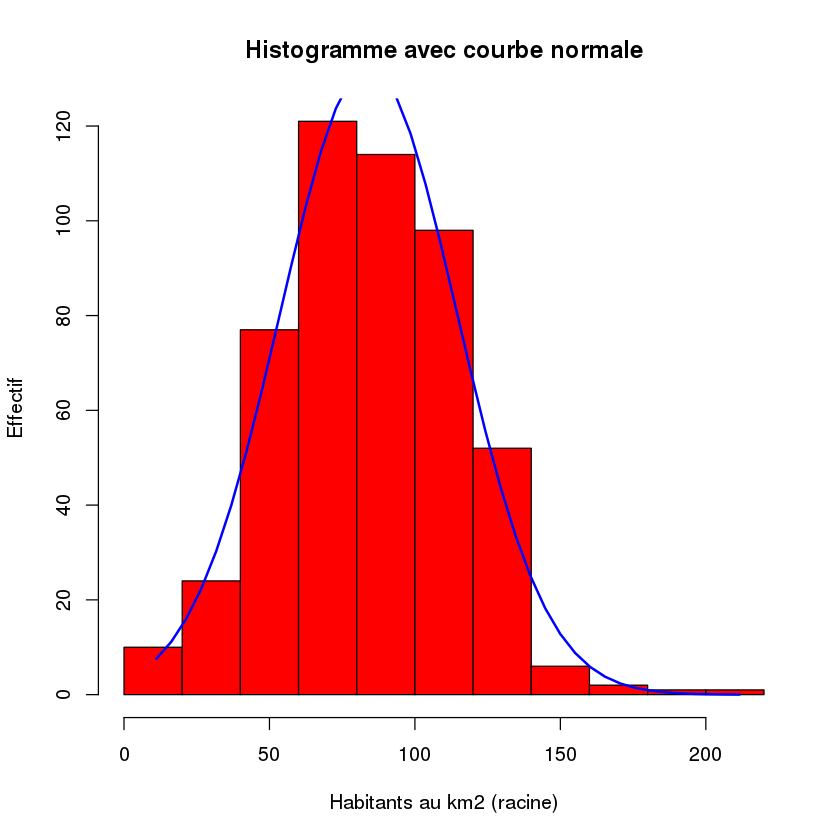

In [21]:
x <- fichierDBF$SqrtDens
h<-hist(x, breaks=10, col="red", xlab="Habitants au km2 (racine)", ylab = "Effectif",
main="Histogramme avec courbe normale")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

---

## Labo 3

### Graphiques

* [couleurs](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf)
* [graphiques de base](http://www.ats.ucla.edu/stat/r/gbe/default.htm)
* [graphiques avancés](http://www.statmethods.net/graphs/creating.html)

In [3]:
# install
#install.packages('doBy', repos="http://cran.rstudio.com/")
#install.packages('gmodels', repos="http://cran.rstudio.com/")
#install.packages('scatterplot3d', repos="http://cran.rstudio.com/")

# import
library(foreign)
library(nortest)
library(sas7bdat)
library(Hmisc)
library(pastecs)
library(ggplot2)
library(doBy)
library(gmodels)
library(scatterplot3d)

# data
Tableau1 <- read.sas7bdat("data/labo3/tableau1.sas7bdat", debug=FALSE)
names(Tableau1)

TableauKhi2 <- read.sas7bdat("data/labo3/khi2.sas7bdat", debug=FALSE)
names(TableauKhi2)


The downloaded source packages are in
	‘/tmp/RtmpU5CYbS/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘gtools’, ‘gdata’




The downloaded source packages are in
	‘/tmp/RtmpU5CYbS/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



The downloaded source packages are in
	‘/tmp/RtmpU5CYbS/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "POPTOT_FR"  "FAIBLEREV"  "MONOPCT"    "MENAGE1PCT" "IMMREC_PCT"
 [6] "TX_CHOM"    "NOECOLEPCT" "SCO_M9PCT"  "SCO_M13PCT" "PARTIELPCT"
[11] "FAIBREVPCT" "INDICE_PAU" "Dist_Min"   "N_1000"     "Dist_Moy_3"
[16] "Km2"        "HabKm2"     "SqrtDens"   "LogDens"    "SqrtImg"   
[21] "LogImg"     "Id"

[1] "SEX"  "DIST" "Mode"

#### Histogrammes classiques

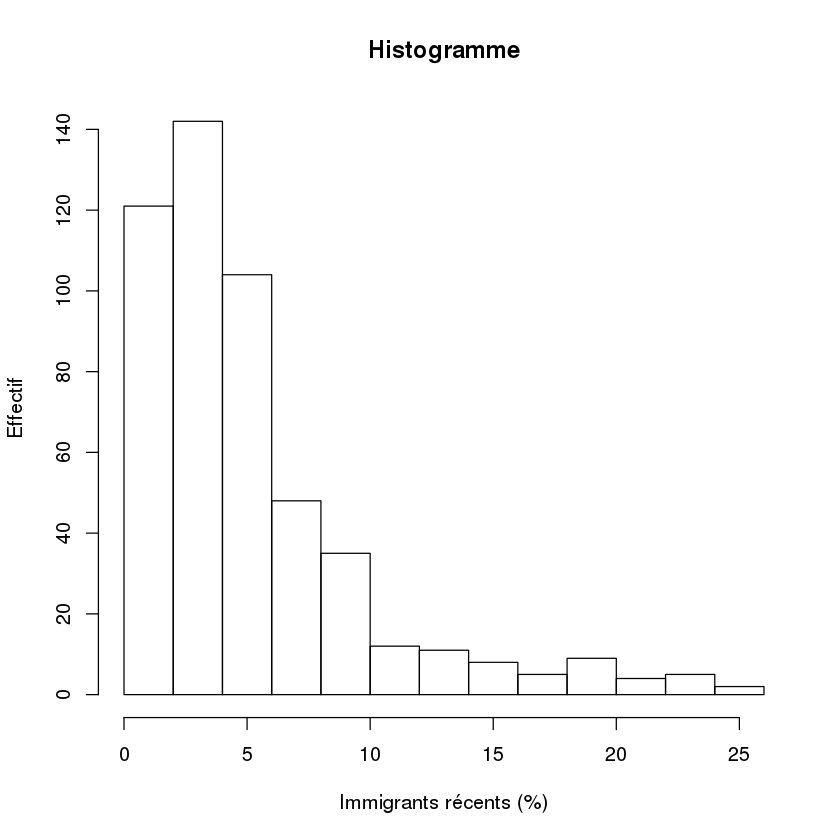

In [4]:
hist(Tableau1$IMMREC_PCT, breaks=10, xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

breaks = nombre de barres

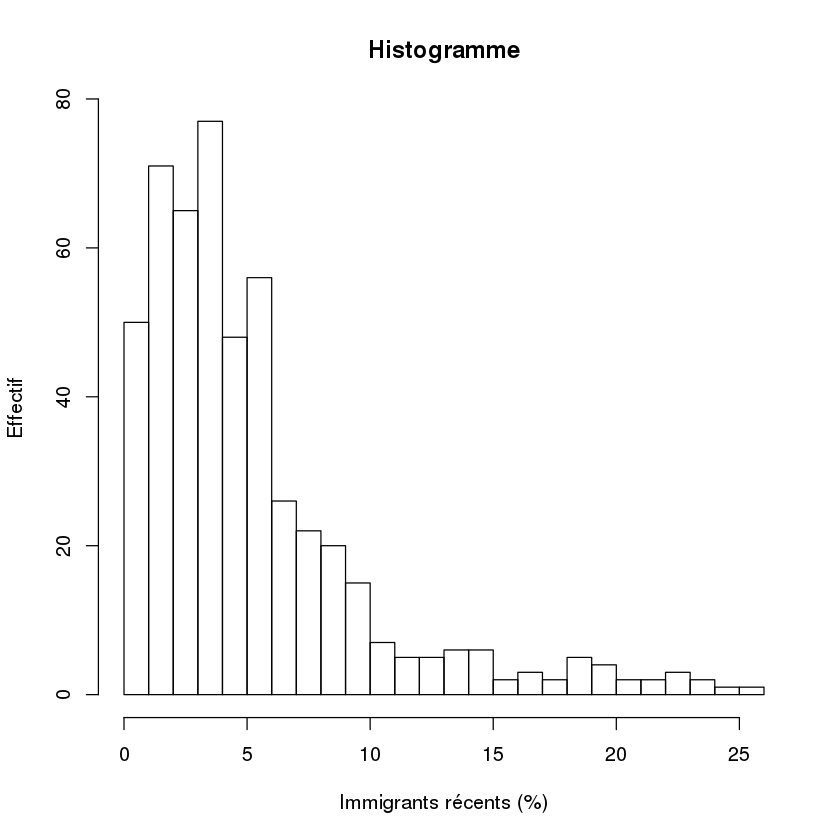

In [5]:
hist(Tableau1$IMMREC_PCT, breaks=20, xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

density = pour rendu barres (ex.: hachures)

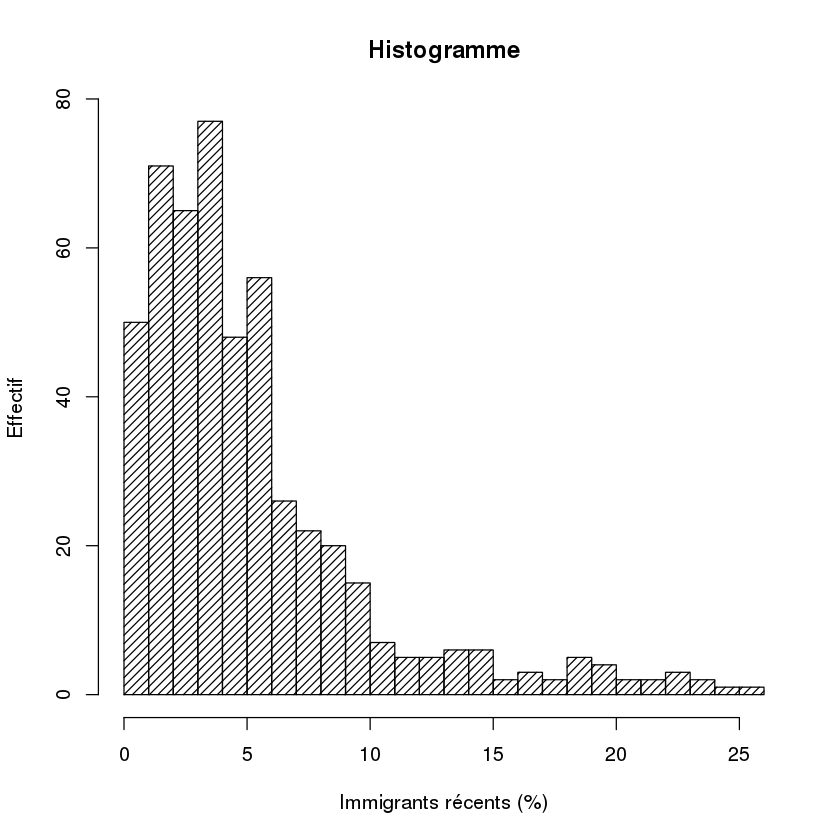

In [6]:
hist(Tableau1$IMMREC_PCT, density=20, breaks=20, xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

col = colours

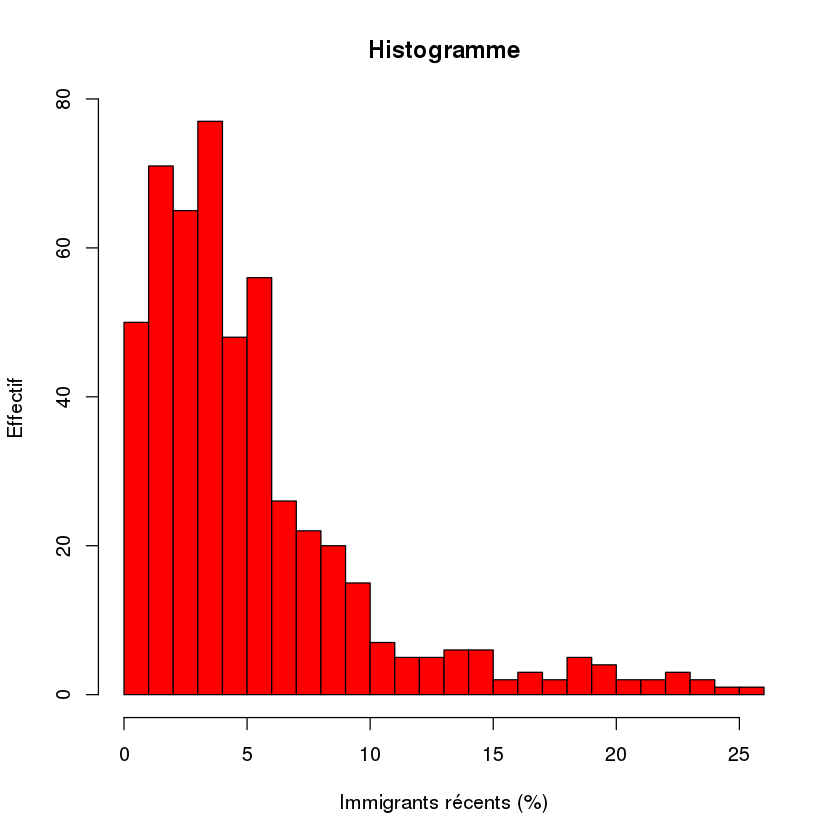

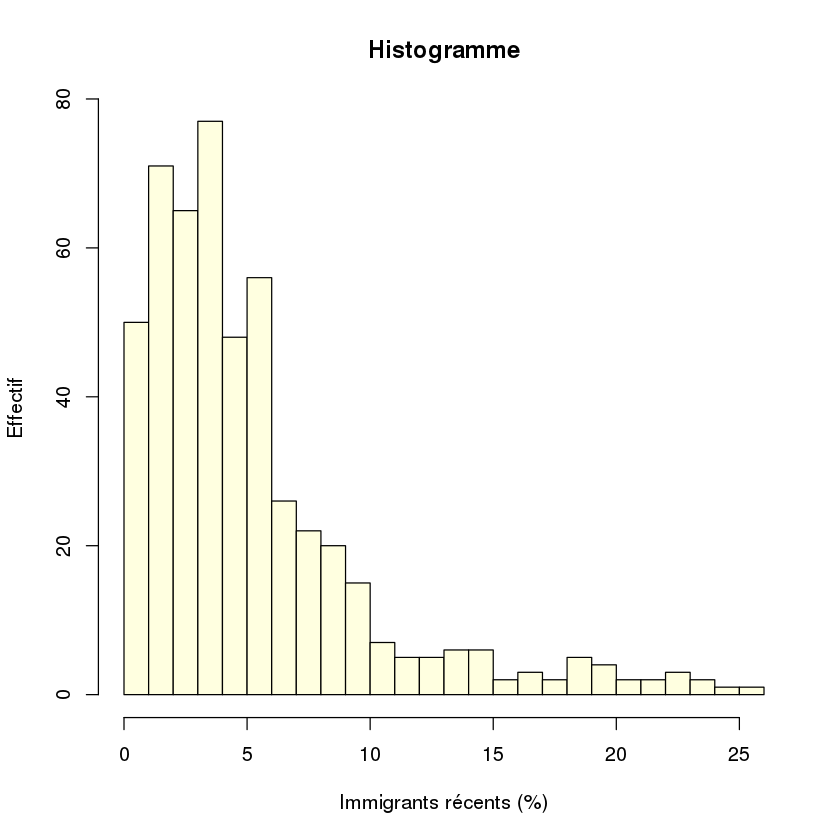

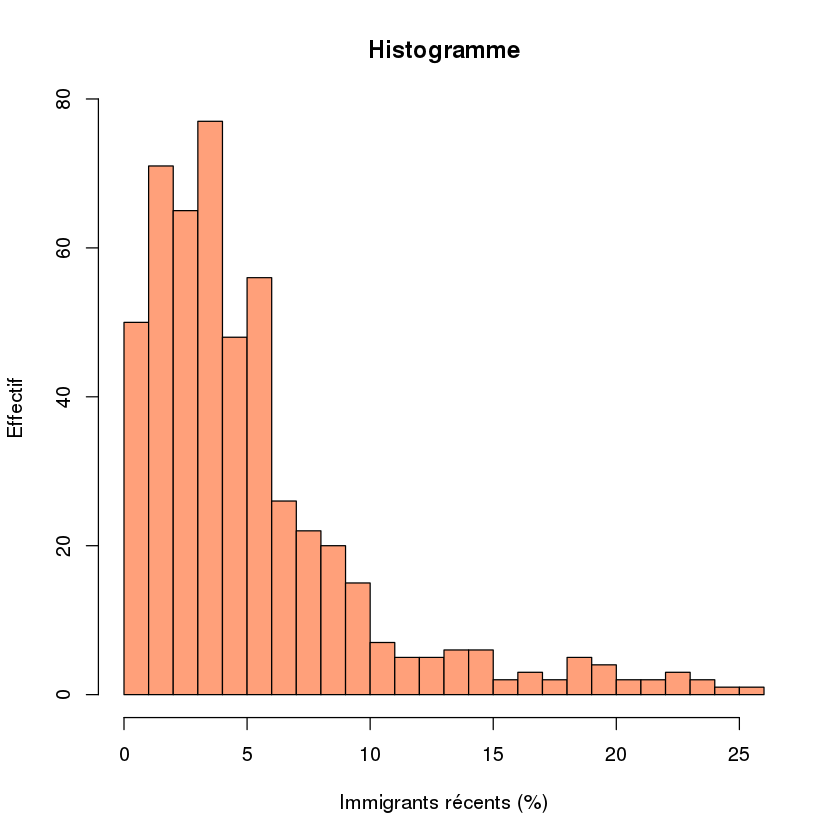

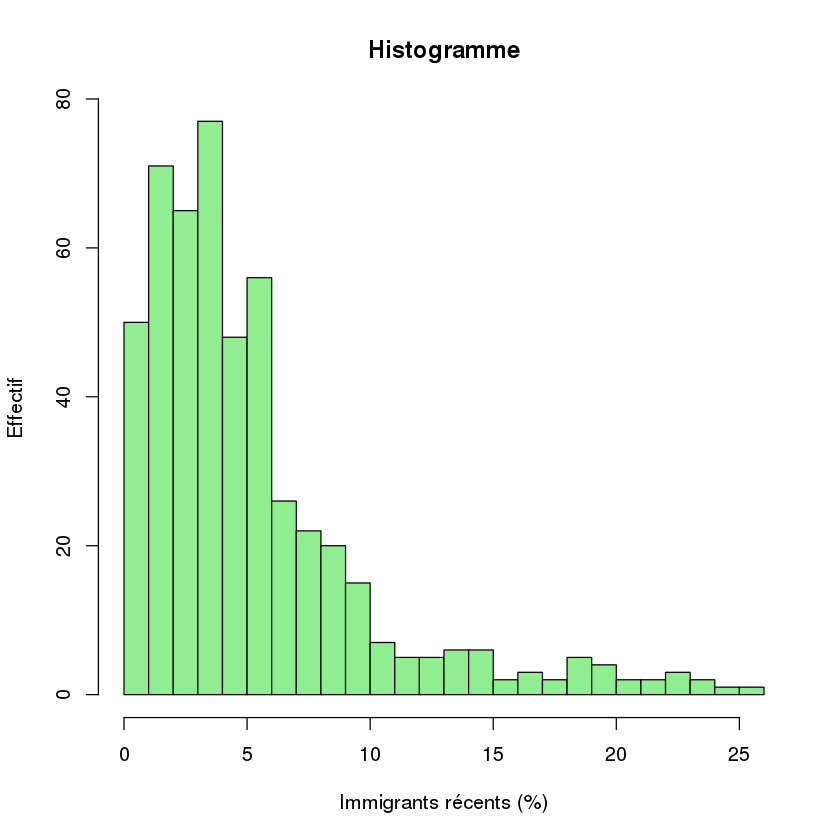

In [7]:
hist(Tableau1$IMMREC_PCT, breaks=20, col="red", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 
hist(Tableau1$IMMREC_PCT, breaks=20, col="lightyellow", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 
hist(Tableau1$IMMREC_PCT, breaks=20, col="lightsalmon", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 
hist(Tableau1$IMMREC_PCT, breaks=20, col="lightgreen", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme") 

ylim = limites

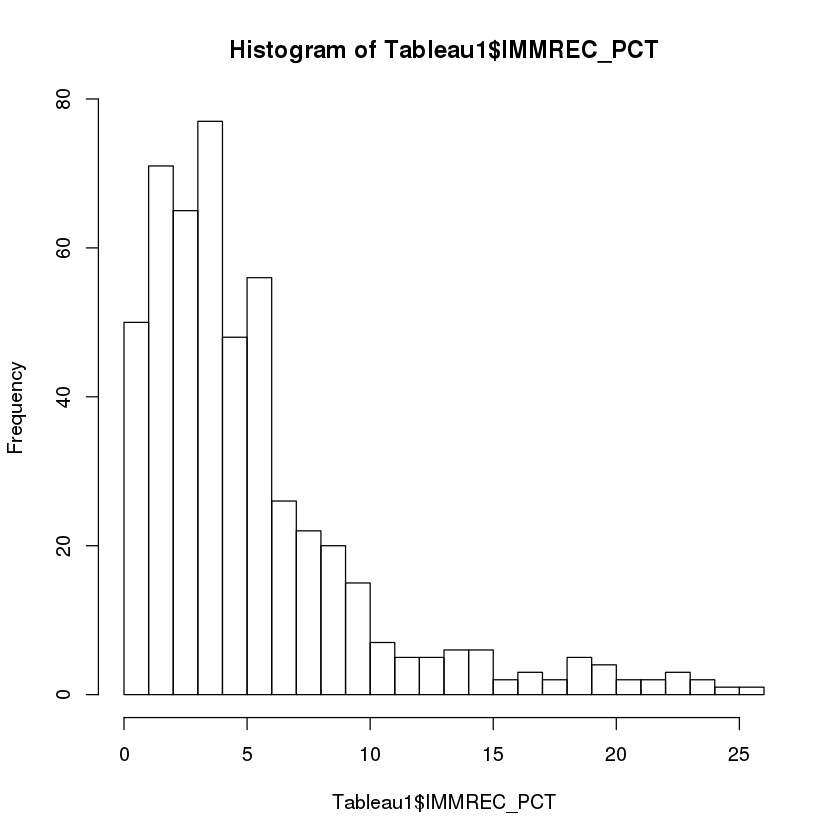

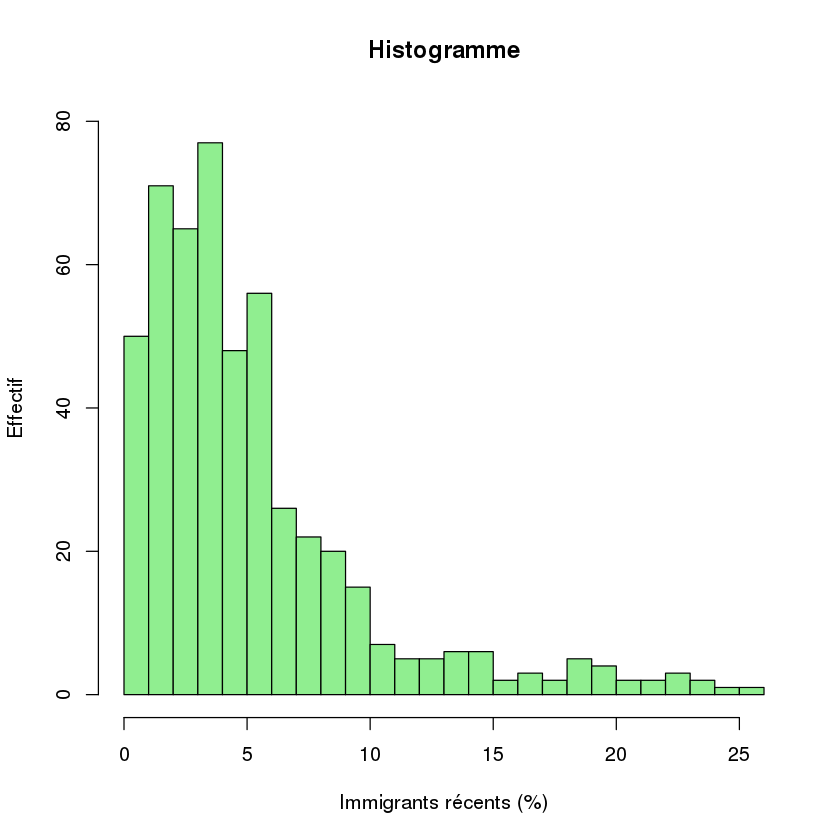

In [10]:
plot(
    hist(Tableau1$IMMREC_PCT, breaks=20),
    ylim=c(0, 80), col="lightgreen", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme"
) 

prob : proportion vs effectif

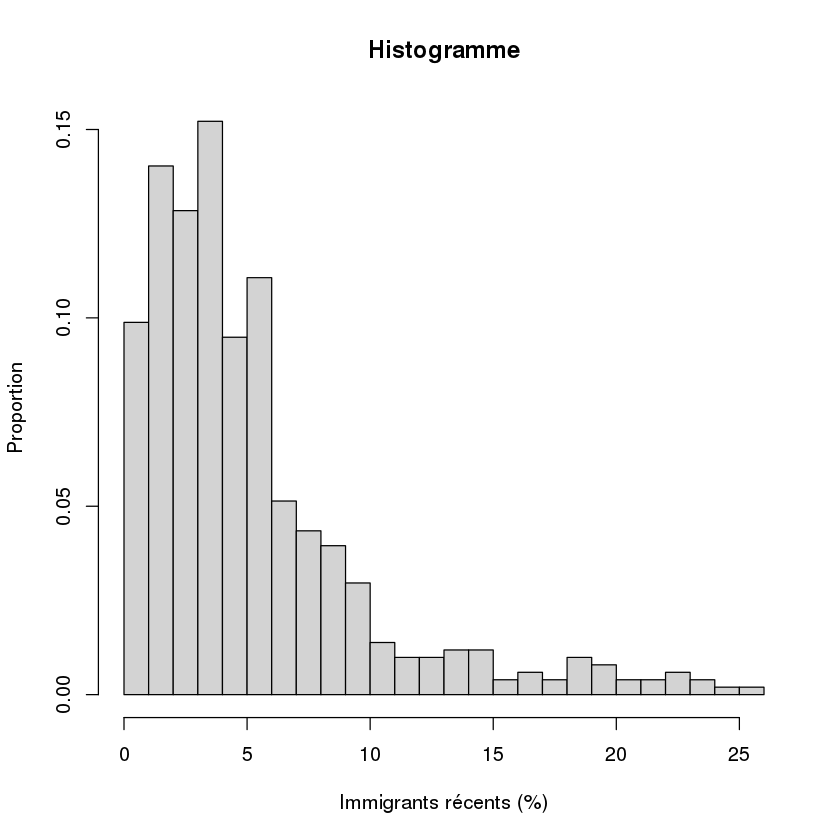

In [11]:
hist(Tableau1$IMMREC_PCT, col="lightgray", breaks=20, xlab="Immigrants récents (%)", ylab = "Proportion", main="Histogramme", prob=TRUE)

#### Histogrammes avec courbe normale

y = proportion

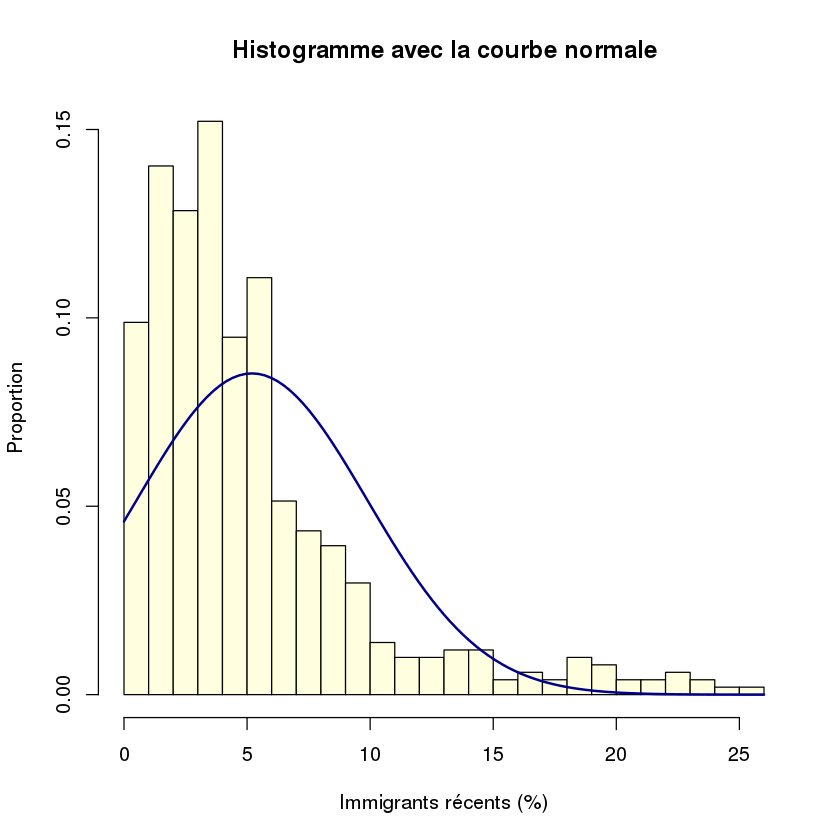

In [13]:
m <- mean(Tableau1$IMMREC_PCT)
std <- sd(Tableau1$IMMREC_PCT)
hist(Tableau1$IMMREC_PCT, col="lightyellow", breaks=20, prob=TRUE, xlab="Immigrants récents (%)", ylab = "Proportion", main="Histogramme avec la courbe normale")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)

y = effectif

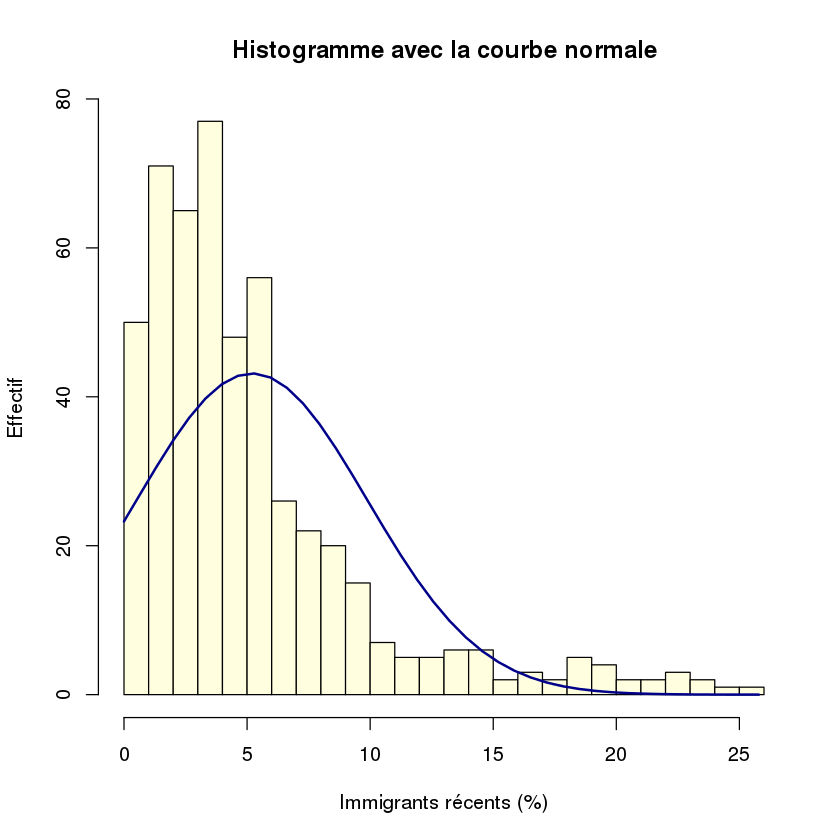

In [14]:
x <- Tableau1$IMMREC_PCT
h<-hist(x, breaks=20, col="lightyellow", xlab="Immigrants récents (%)", ylab = "Effectif", main="Histogramme avec la courbe normale") 
xfit<-seq(min(x),max(x),length=40) 
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x)) 
yfit <- yfit*diff(h$mids[1:2])*length(x) 
lines(xfit, yfit, col="darkblue", lwd=2)

#### Nuages de points

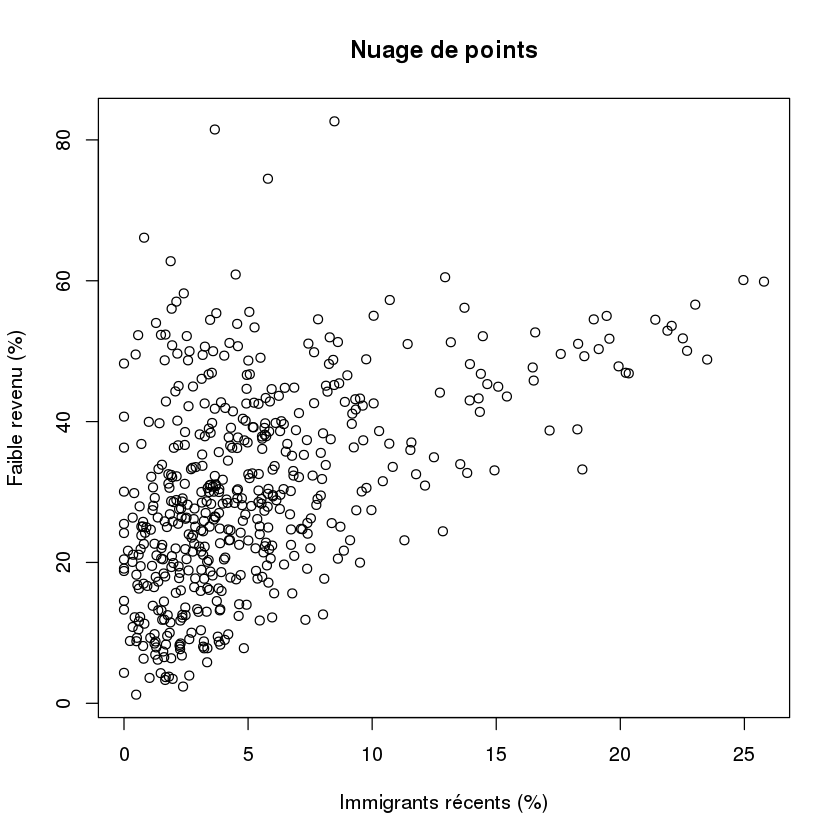

In [15]:
plot(Tableau1$IMMREC_PCT, Tableau1$FAIBREVPCT, xlab="Immigrants récents (%)", ylab = "Faible revenu (%)", main="Nuage de points")

#### Nuages de points avec droite de régression

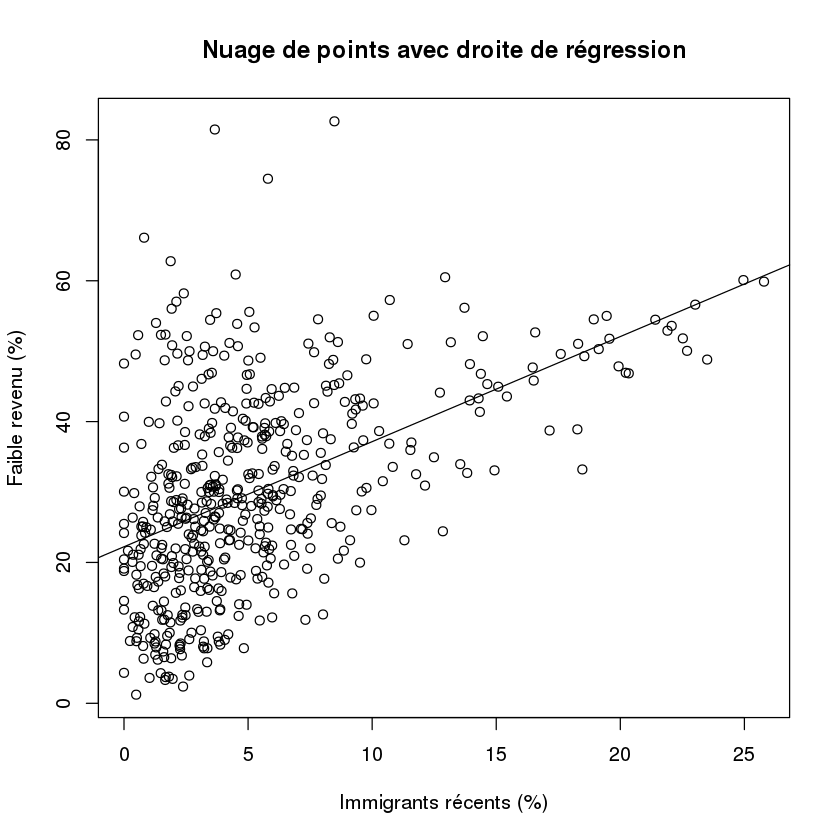

In [16]:
plot(Tableau1$IMMREC_PCT, Tableau1$FAIBREVPCT, xlab="Immigrants récents (%)", ylab = "Faible revenu (%)", main="Nuage de points avec droite de régression")
abline(lsfit(Tableau1$IMMREC_PCT, Tableau1$FAIBREVPCT))

#### Matrice de nuage de points

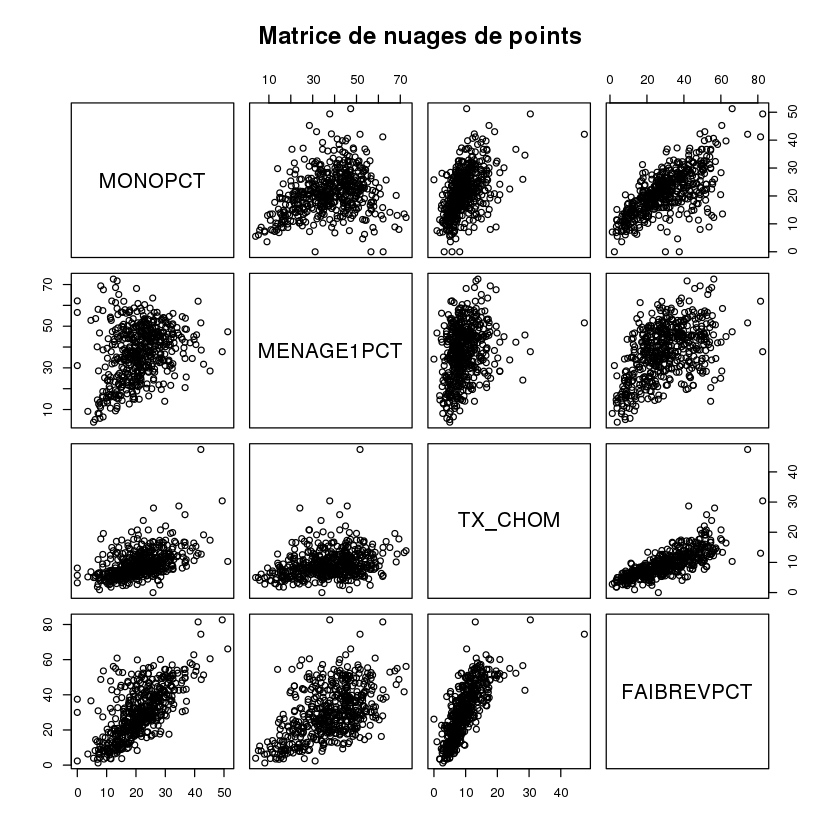

In [17]:
pairs(~MONOPCT+MENAGE1PCT+TX_CHOM+FAIBREVPCT,data=Tableau1, 
      main="Matrice de nuages de points")

#### Nuages de point 3D

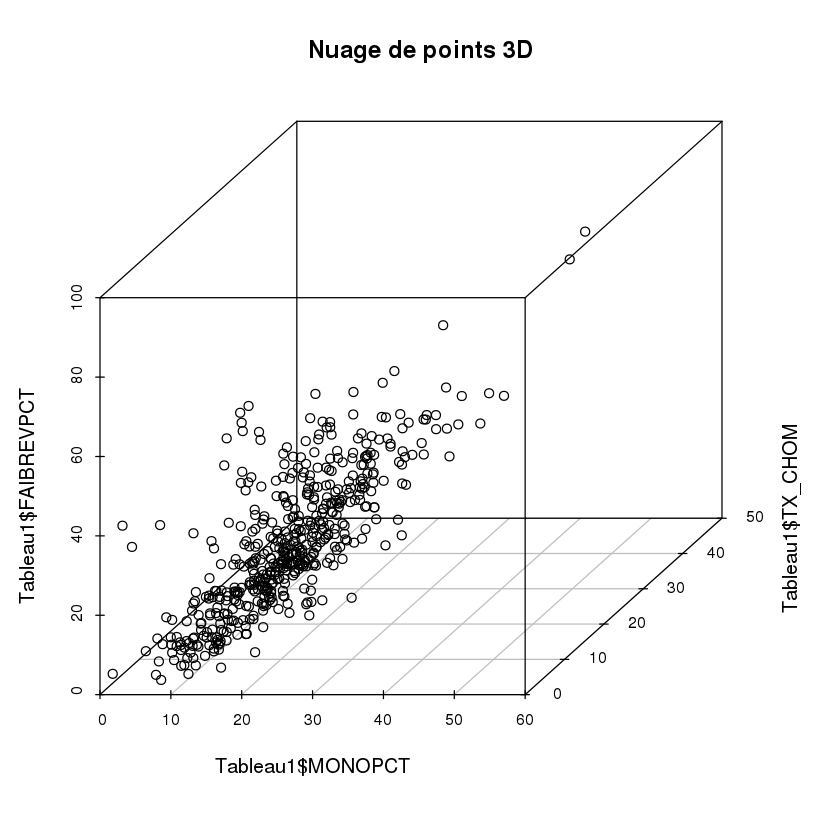

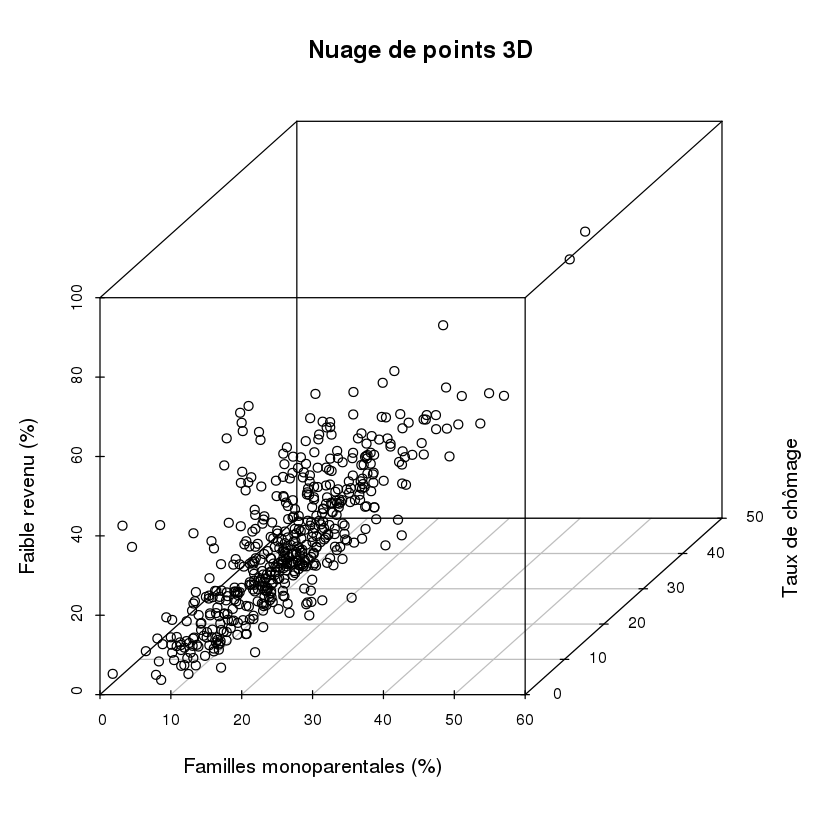

In [18]:
scatterplot3d(Tableau1$MONOPCT, Tableau1$TX_CHOM, Tableau1$FAIBREVPCT, main="Nuage de points 3D")
scatterplot3d(Tableau1$MONOPCT, Tableau1$TX_CHOM, Tableau1$FAIBREVPCT, main="Nuage de points 3D", xlab="Familles monoparentales (%)", ylab="Taux de chômage", zlab="Faible revenu (%)");

### Matrice de corrélation

#### Pearson

In [19]:
rcorr(cbind(Tableau1$MONOPCT,Tableau1$MENAGE1PCT,Tableau1$TX_CHOM,Tableau1$FAIBREVPCT,Tableau1$Dist_Min,Tableau1$N_1000), type="pearson")

      [,1]  [,2]  [,3]  [,4]  [,5]  [,6]
[1,]  1.00  0.27  0.50  0.68 -0.36  0.29
[2,]  0.27  1.00  0.27  0.50 -0.46  0.45
[3,]  0.50  0.27  1.00  0.76 -0.30  0.19
[4,]  0.68  0.50  0.76  1.00 -0.44  0.33
[5,] -0.36 -0.46 -0.30 -0.44  1.00 -0.61
[6,]  0.29  0.45  0.19  0.33 -0.61  1.00

n= 506 


P
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]       0    0    0    0    0  
[2,]  0         0    0    0    0  
[3,]  0    0         0    0    0  
[4,]  0    0    0         0    0  
[5,]  0    0    0    0         0  
[6,]  0    0    0    0    0       

#### Spearman

In [20]:
rcorr(cbind(Tableau1$MONOPCT,Tableau1$MENAGE1PCT,Tableau1$TX_CHOM,Tableau1$FAIBREVPCT,Tableau1$Dist_Min,Tableau1$N_1000), type="spearman")

      [,1]  [,2]  [,3]  [,4]  [,5]  [,6]
[1,]  1.00  0.28  0.53  0.66 -0.37  0.35
[2,]  0.28  1.00  0.30  0.49 -0.47  0.48
[3,]  0.53  0.30  1.00  0.81 -0.35  0.31
[4,]  0.66  0.49  0.81  1.00 -0.44  0.42
[5,] -0.37 -0.47 -0.35 -0.44  1.00 -0.89
[6,]  0.35  0.48  0.31  0.42 -0.89  1.00

n= 506 


P
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]       0    0    0    0    0  
[2,]  0         0    0    0    0  
[3,]  0    0         0    0    0  
[4,]  0    0    0         0    0  
[5,]  0    0    0    0         0  
[6,]  0    0    0    0    0       

### Régression linéaire simple

In [21]:
reg <- lm(TX_CHOM ~ FAIBREVPCT, data = Tableau1)
summary(reg)

names(Tableau1)


Call:
lm(formula = TX_CHOM ~ FAIBREVPCT, data = Tableau1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8828 -1.5430 -0.0331  1.2713 27.2094 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.197381   0.306152   7.177 2.56e-12 ***
FAIBREVPCT  0.242089   0.009222  26.252  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.958 on 504 degrees of freedom
Multiple R-squared:  0.5776,	Adjusted R-squared:  0.5768 
F-statistic: 689.2 on 1 and 504 DF,  p-value: < 2.2e-16


[1] "POPTOT_FR"  "FAIBLEREV"  "MONOPCT"    "MENAGE1PCT" "IMMREC_PCT"
 [6] "TX_CHOM"    "NOECOLEPCT" "SCO_M9PCT"  "SCO_M13PCT" "PARTIELPCT"
[11] "FAIBREVPCT" "INDICE_PAU" "Dist_Min"   "N_1000"     "Dist_Moy_3"
[16] "Km2"        "HabKm2"     "SqrtDens"   "LogDens"    "SqrtImg"   
[21] "LogImg"     "Id"

### Tableau de contingence

In [22]:
names(TableauKhi2)

[1] "SEX"  "DIST" "Mode"

#### Modalités variables nominales

In [23]:
# sex
table(TableauKhi2$SEX)
TableauKhi2$SEX <- factor(TableauKhi2$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
table(TableauKhi2$SEX)

# transport mode
table(TableauKhi2$Mode)
TableauKhi2$Mode <- factor(TableauKhi2$Mode, levels = c(0:4), labels = c("Auto (conducteur)", "Auto (passager)", "Transport en commun", "Tranport actif", "Autres"))
table(TableauKhi2$Mode)

# distance
table(TableauKhi2$DIST)
TableauKhi2$DIST <- factor(TableauKhi2$DIST, levels = c(1:7), labels = c("Moins de 5 km", "5 à 9,9 km","10 à 14,9 km", "15 à 19,9 km", "20 à 24,9 km", "25 à 29,9 km", "30 km et plus"))
table(TableauKhi2$DIST)


    1     2 
14276 13035 


Homme Femme 
14276 13035 


    0     1     2     3     4 
11868   851  3993  1271  9328 


  Auto (conducteur)     Auto (passager) Transport en commun      Tranport actif 
              11868                 851                3993                1271 
             Autres 
               9328 


   1    2    3    4    5    6    7 
5412 4007 2720 1649 1154  597  833 


Moins de 5 km    5 à 9,9 km  10 à 14,9 km  15 à 19,9 km  20 à 24,9 km 
         5412          4007          2720          1649          1154 
 25 à 29,9 km 30 km et plus 
          597           833 

Tableau de contingence

In [24]:
CrossTable(TableauKhi2$SEX, TableauKhi2$Mode, chisq=TRUE, expected=TRUE, resid=TRUE, format="SPSS")
CrossTable(TableauKhi2$SEX, TableauKhi2$DIST, chisq=TRUE, expected=TRUE, resid=TRUE, format="SPSS")
CrossTable(TableauKhi2$Mode, TableauKhi2$DIST, chisq=TRUE, expected=TRUE, resid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|                Residual |
|-------------------------|

Total Observations in Table:  27311 

                | TableauKhi2$Mode 
TableauKhi2$SEX |   Auto (conducteur)  |     Auto (passager)  | Transport en commun  |      Tranport actif  |              Autres  |           Row Total | 
----------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
          Homme |               5099  |                577  |               2321  |                661  |               5618  |              14276  | 
                |           6203.638  |            444.835  |           2087.220  |            664.377  |           4875.930  |                     | 
                |            196.695  |        

Warning message:
In chisq.test(t, correct = FALSE, ...): Chi-squared approximation may be incorrect


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|                Residual |
|-------------------------|

Total Observations in Table:  16372 

                    | TableauKhi2$DIST 
   TableauKhi2$Mode | Moins de 5 km  |    5 à 9,9 km  |  10 à 14,9 km  |  15 à 19,9 km  |  20 à 24,9 km  |  25 à 29,9 km  | 30 km et plus  |     Row Total | 
--------------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|
  Auto (conducteur) |         2826  |         2467  |         1962  |         1262  |          927  |          456  |          664  |        10564  | 
                    |     3492.082  |     2585.509  |     1755.075  |     1064.014  |      744.616  |      385.213  |      537.492  |               | 
                    |      127.049  |    

---

## Labo 4

In [2]:
# import
library(foreign)
library(nortest)
library(sas7bdat)
library(doBy)

# data
MTL <- read.sas7bdat("data/labo4/mtl_ttest.sas7bdat", debug=FALSE)
TOR <- read.sas7bdat("data/labo4/tor_ttest.sas7bdat", debug=FALSE)
VAN <- read.sas7bdat("data/labo4/van_ttest.sas7bdat", debug=FALSE)
TROISRMR <- read.sas7bdat("data/labo4/troisrmr_anova.sas7bdat", debug=FALSE)
names(MTL)
names(TOR)
names(VAN)
names(TROISRMR)

Loading required package: survival


[1] "CMA"       "SEX"       "TOTINC"    "WEIGHT"    "LogTotInc"

[1] "CMA"       "SEX"       "TOTINC"    "WEIGHT"    "LogTotInc"

[1] "CMA"       "SEX"       "TOTINC"    "WEIGHT"    "LogTotInc"

[1] "CMA"    "GROSRT" "VALUE"  "HH_ID"

In [3]:
# modalités (labels)
table(MTL$SEX)
table(TOR$SEX)
table(VAN$SEX)
MTL$SEX <- factor(MTL$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
TOR$SEX <- factor(TOR$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
VAN$SEX <- factor(VAN$SEX, levels = c(1,2), labels = c("Homme", "Femme"))
table(MTL$SEX)
table(TOR$SEX)
table(VAN$SEX)

TROISRMR$CMA <- factor(TROISRMR$CMA, levels = c(462,535,933), labels = c("Montréal", "Toronto", "Vancouver"))
table(TROISRMR$CMA)


    1     2 
13685 12698 


    1     2 
18429 17013 


   1    2 
7859 7327 


Homme Femme 
13685 12698 


Homme Femme 
18429 17013 


Homme Femme 
 7859  7327 


 Montréal   Toronto Vancouver 
    15173     17935      8103 

### T-Test : Comparaison de moyennes

#### Test F

Vérification de l'égalité des variances

In [6]:
var.test(TOTINC ~ SEX, alternative='two.sided', conf.level=.95, data=MTL)


	F test to compare two variances

data:  TOTINC by SEX
F = 0.1925, num df = 13684, denom df = 12697, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1860374 0.1991902
sample estimates:
ratio of variances 
         0.1925036 


Interprétation
* **p-value < 2.2e-16**
    * p < 0.05 alors méthode Satterthwaite
* **true ratio of variances is not equal to 1**

#### Méthode Satterthwaite

Pas égales : P < 0,05
* `var.equal=FALSE`

In [7]:
t.test(TOTINC~SEX, alternative='two.sided', conf.level=.95, var.equal=FALSE, data=MTL)


	Welch Two Sample t-test

data:  TOTINC by SEX
t = -27.088, df = 17131, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16456.17 -14235.32
sample estimates:
mean in group Homme mean in group Femme 
           29117.09            44462.84 


Interprétation
* **t = -27.088**
* **p-value < 2.2e-16**

#### Méthode Pooled

Égales : P >= 0,05
* `var.equal=TRUE`


	Two Sample t-test

data:  TOTINC by SEX
t = -27.783, df = 26381, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16428.36 -14263.13
sample estimates:
mean in group Homme mean in group Femme 
           29117.09            44462.84 


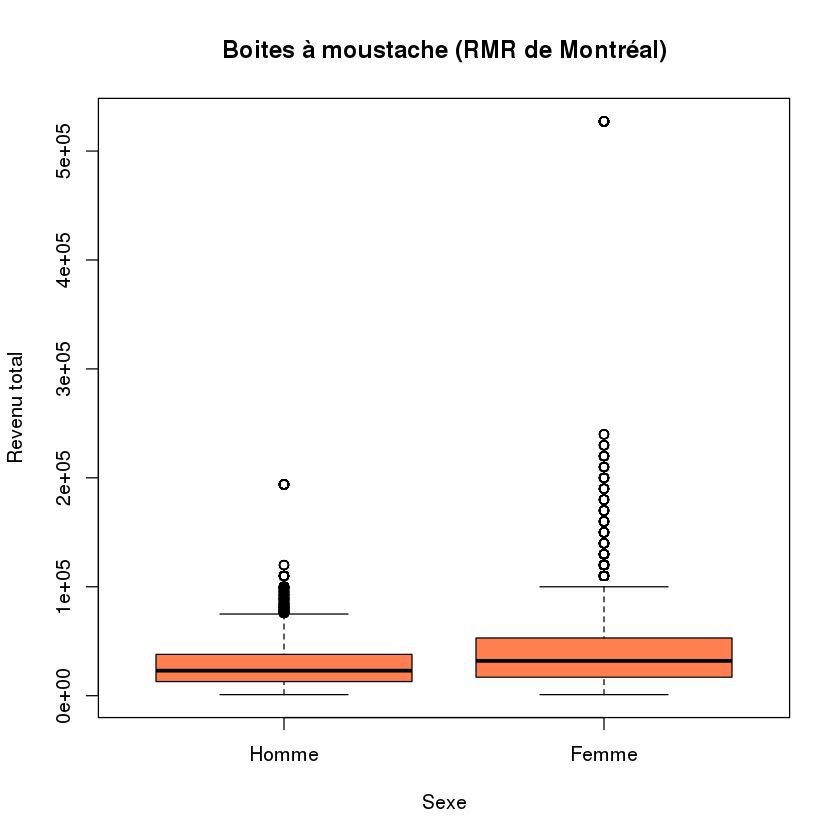

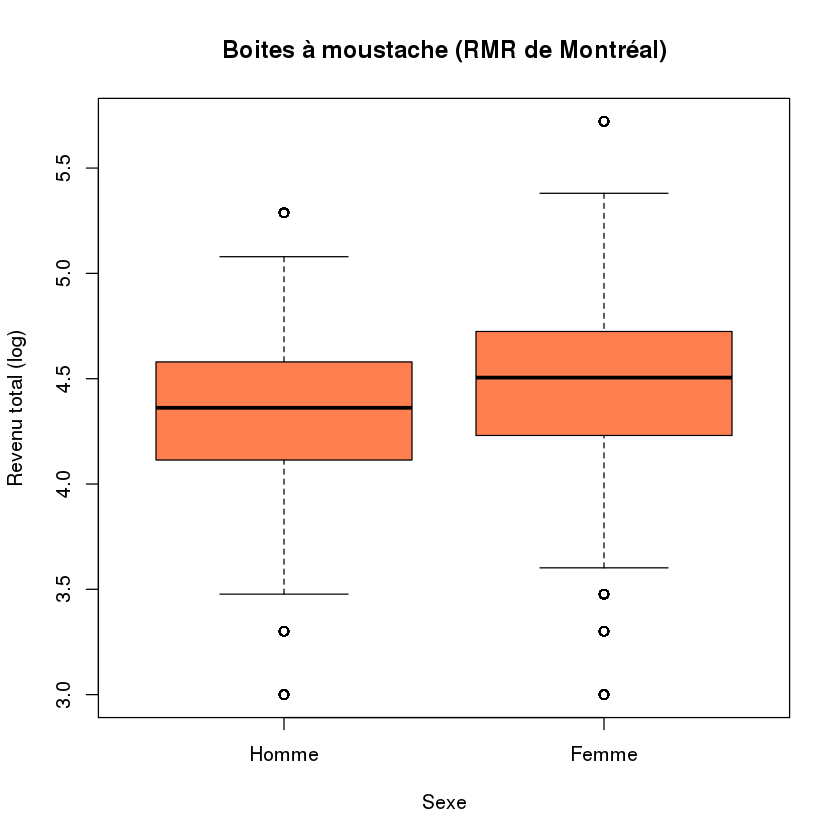

In [8]:
t.test(TOTINC~SEX, alternative='two.sided', conf.level=.95, var.equal=TRUE, data=MTL)
boxplot(TOTINC~SEX, data = MTL, col = "coral", main="Boites à moustache (RMR de Montréal)", xlab="Sexe", ylab="Revenu total")
boxplot(LogTotInc~SEX, data = MTL, col = "coral", main="Boites à moustache (RMR de Montréal)", xlab="Sexe", ylab="Revenu total (log)")

Interprétation
* **t = -27.783**
* **p-value < 2.2e-16**

### Analyse des résultats

Contexte dataset, valeurs et comparaison des 2 moyennes des 2 modes de la variable qualitative, "la différence entre les moyennes (x) est d'ailleurs significative (t=27,09; P<0,001)".

### ANOVA : Analyse de variance

Moyenne par groupe

In [9]:
# doBy
summaryBy(GROSRT ~ CMA, TROISRMR, FUN=c(mean), na.rm=TRUE)

CMA GROSRT.mean
1  Montréal    622.3443
2   Toronto    858.7333
3 Vancouver    796.6063

#### Boxplot

Visualisation d'ANOVA

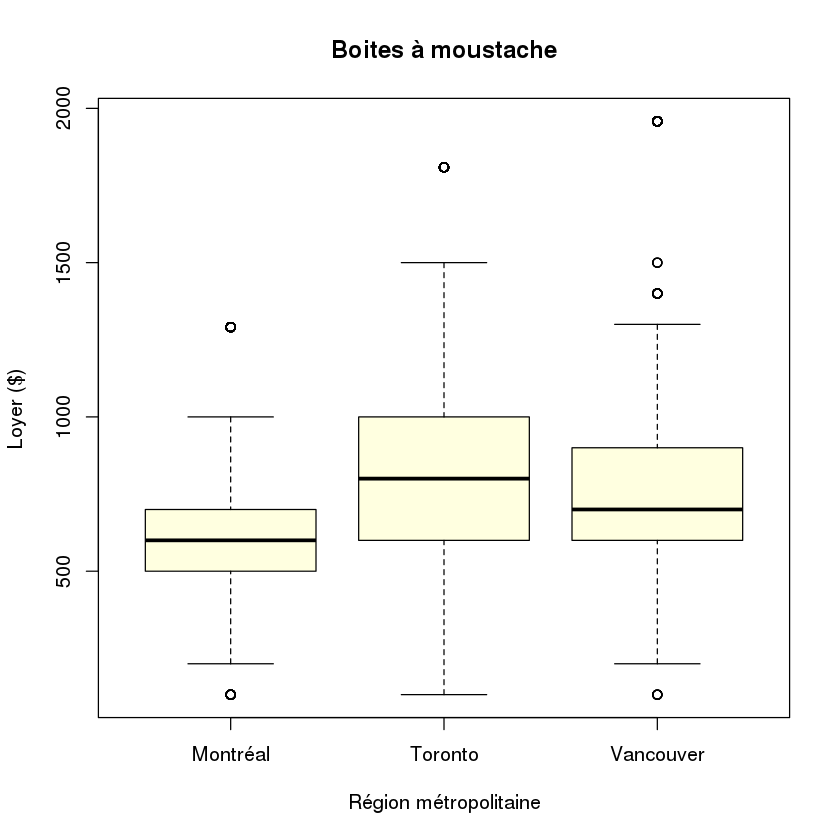

In [11]:
boxplot(GROSRT ~ CMA, data = TROISRMR, col = "lightyellow", main="Boites à moustache", xlab="Région métropolitaine", ylab="Loyer ($)")  #Analyse de variance : test F

#### ANOVA

In [13]:
anova.aov <- aov(GROSRT ~ CMA, data = TROISRMR)
summary(anova.aov)

              Df    Sum Sq  Mean Sq F value Pr(>F)    
CMA            2 100629004 50314502     506 <2e-16 ***
Residuals   8379 833199213    99439                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
32829 observations deleted due to missingness

Interprétation
* **CMA Sum Sq** = variance expliquée (inter)
* **Residuals Sum Sq** = variance non expliquée (intra)
* **CMA Df** = nombre de degrés de liberté pour variance expliquée (inter)
* **Residuals Df** = nombre de degrés de liberté pour variance non expliquée (intra)
* **CMA F value** = F observé
* **CMA Pr(>F)** = Valeur de P rattachée à valeur de F

#### Test de F

Hypothèse H0 = "indépendance entre les deux variances (inter et intra)"

* k = nombre de groupes
* n = nombre d'observations

* DL numérateur (VE, inter) de table de Fisher
    * k - 1
* DL dénominateur (VNE, intra) de table de Fisher
    * n - k

Calcul F théorique **(avec quelle méthode?)**
* F théorique
* P associé au F théorique, seuils de signification
    * 95% : p=0,05
    * 99% : p=0,01
    * 99,9% : p=0,001

In [20]:
f_theorique <- qf(0.99, 2, 8379)
f_theorique
# qt() pour table Student t pour coefficient de ... (voir autres cours)

[1] 4.607702

Interprétation
* F observé > à F théorique
    * moyennes sont statistiquement différentes
    * H0 rejeté
* F observé < F théorique
    * moyennes des groupes ne sont pas différentes
    * H0 validée

#### Calcul R carré

Pour obtenir Coefficient de détermination

In [14]:
anova.r2 <- lm(GROSRT ~ CMA, data = TROISRMR)
summary(anova.r2)


Call:
lm(formula = GROSRT ~ CMA, data = TROISRMR)

Residuals:
    Min      1Q  Median      3Q     Max 
-758.73 -158.73  -22.34  103.39 1161.39 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   622.344      4.760  130.73   <2e-16 ***
CMAToronto    236.389      7.751   30.50   <2e-16 ***
CMAVancouver  174.262      9.854   17.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 315.3 on 8379 degrees of freedom
  (32829 observations deleted due to missingness)
Multiple R-squared:  0.1078,	Adjusted R-squared:  0.1075 
F-statistic:   506 on 2 and 8379 DF,  p-value: < 2.2e-16


Interprétation
* **Multiple R-squared** = Coefficient de détermination
    * la variable qualitative explique à x% la variation de la vaiable quantitative

#### Test de Tukey

Comparaison des moyennes groupes, 2 à 2

In [16]:
TukeyHSD(anova.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = GROSRT ~ CMA, data = TROISRMR)

$CMA
                        diff       lwr       upr p adj
Toronto-Montréal   236.38891 218.22044 254.55738     0
Vancouver-Montréal 174.26194 151.16411 197.35976     0
Vancouver-Toronto  -62.12697 -86.91723 -37.33671     0
